# Linear Regression : House prices

## We load the libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import statsmodels.api as sm

## We load ours data

In [2]:
house = pd.read_csv('kaggle-house-prices-train.csv', index_col=0)

In [3]:
house.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
house['Surface'] = house['TotalBsmtSF'] + house['GrLivArea']

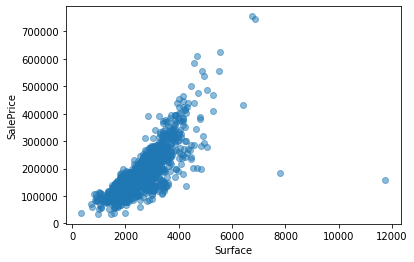

In [5]:
plt.plot(house["Surface"], house["SalePrice"], 'o',alpha=0.5)
plt.xlabel("Surface")
plt.ylabel("SalePrice")
plt.show()

## We only keep the value of Surface <  7 000

In [6]:
house_ok = house.drop(house[house.Surface > 7000].index)
house.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Surface
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,2158
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,3380
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,3197
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,2726


## We display the scatter plot SalePrice on Surface

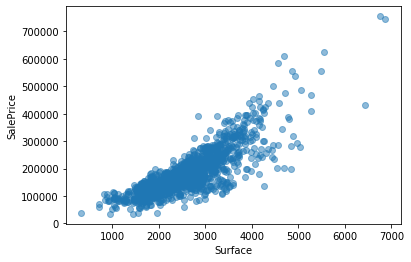

In [7]:
plt.plot(house_ok["Surface"], house_ok["SalePrice"], 'o',alpha=0.5)
plt.xlabel("Surface")
plt.ylabel("SalePrice")
plt.show()

## We print the correlation coefficient 

In [8]:
sale_price_fonction_surface = st.pearsonr(house_ok["SalePrice"],house_ok["Surface"])
print("coefficients de corrélation linéaires de SalePrice en fonction Surface : ", sale_price_fonction_surface)



coefficients de corrélation linéaires de SalePrice en fonction Surface :  (0.8290419781065508, 0.0)


## We use the Ordinary Least Square for get the params

In [9]:
# Y la variable SalePrice, sur le dataframe house_ok 

Y = house_ok['SalePrice']
# X est la variable LotArea sur le dataframe house_ok 
X = house_ok[['Surface']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Surface'],result.params['intercept']

## We display the plot with the linear regression

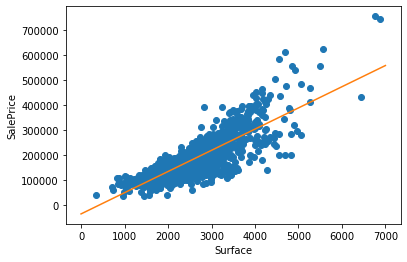

coeffs : a = 84.90834138104182 et b = -36687.39283709003


In [10]:
plt.plot(house_ok.Surface,house_ok.SalePrice, "o")
plt.plot(np.arange(7000),[a*x+b for x in np.arange(7000)])
plt.xlabel("Surface")
plt.ylabel("SalePrice")
plt.show()
print("coeffs : a =", a, "et b =", b)

## We estimate an exemple 

In [11]:
X = 20000
Y = a*X + b
Y

1661479.4347837465